In [1]:
import nba_api
import matplotlib.pyplot as plt

In [2]:
from nba_api.stats.endpoints import playergamelogs

# Preuzimanje statistika koje se mogu videti na https://www.nba.com/stats/player/203999/boxscores-traditional/?Season=2021-22
log = playergamelogs.PlayerGameLogs(player_id_nullable='203999', season_nullable='2022-23') 
df = log.get_data_frames()[0]

In [3]:
df['DVOCIFRENI'] = ((df['PTS'] >= 10).astype(int) + (df['REB'] >= 10).astype(int) + (df['AST'] >= 10).astype(int) + 
                    (df['STL'] >= 10).astype(int) + (df['BLK'] >= 10).astype(int))
df.index = range(1, len(df) + 1)

In [4]:
w = 10 
mt_td = (df['DVOCIFRENI'] >= 3).rolling(10).sum().loc[10:]
ma_pts = df['PTS'].rolling(10).mean().loc[10:]
ma_reb = df['REB'].rolling(10).mean().loc[10:]
ma_ast = df['AST'].rolling(10).mean().loc[10:]

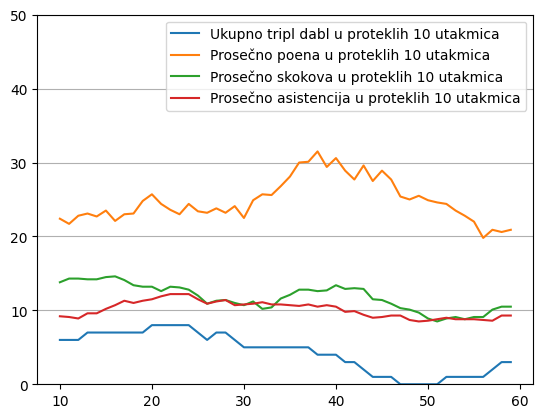

In [5]:
plt.plot(mt_td, label=f"Ukupno tripl dabl u proteklih {w} utakmica")
plt.plot(ma_pts, label=f"Prosečno poena u proteklih {w} utakmica")
plt.plot(ma_reb, label=f"Prosečno skokova u proteklih {w} utakmica")
plt.plot(ma_ast, label=f"Prosečno asistencija u proteklih {w} utakmica")
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 50)
plt.show()